In [2]:
import warnings
warnings.filterwarnings('ignore')

import re
import requests
import xarray as xr
import pandas as pd
import os
import time

In [3]:
username = 'OOIAPI-8H5U9MQ49UCKKE'
token = 'TEMP-TOKEN-SZXAU9MA5X459P'

In [3]:
refdes = 'GP02HYPM-WFP02-04-CTDPFL000'
method = 'recovered_wfp'
stream = 'ctdpf_ckl_wfp_instrument_recovered'
beginDT = '2013-07-26T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2014-06-15T01:01:01.500Z' #one deployment
#endDT = '2018-08-20T01:01:01.500Z' #all deployments until yesterday

base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

data_request_url ='/'.join((base_url,refdes[:8],refdes[9:14],refdes[15:],method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,   
}
r = requests.get(data_request_url, params=params, auth=(username, token))
data = r.json()

import json
print(json.dumps(data, indent=2))

%%time
check_complete = data['allURLs'][1] + '/status.txt'
for i in range(1800): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('request completed')
        break
    else:
        time.sleep(1)

In [5]:
#GS Southern Pacific Data:
refdes = 'GS02HYPM-WFP02-04-CTDPFL000'
method = 'recovered_wfp'
stream = 'ctdpf_ckl_wfp_instrument_recovered'
beginDT = '2015-02-19T01:01:01.500Z' # this time range encompasses all three deployments of this instrument.
endDT = '2015-12-25T01:01:01.500Z' #one deployment

base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

data_request_url ='/'.join((base_url,refdes[:8],refdes[9:14],refdes[15:],method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,   
}
r = requests.get(data_request_url, params=params, auth=(username, token))
data = r.json()

import json
print(json.dumps(data, indent=2))

#%%time
check_complete = data['allURLs'][1] + '/status.txt'
for i in range(1800): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('request completed')
        break
    else:
        time.sleep(1)

{
  "requestUUID": "1c3995e1-202e-4e60-b972-0a1a51c0214b",
  "outputURL": "https://opendap.oceanobservatories.org/thredds/catalog/ooi/mvalera-w@sdsu.edu/20180822T185654-GS02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html",
  "allURLs": [
    "https://opendap.oceanobservatories.org/thredds/catalog/ooi/mvalera-w@sdsu.edu/20180822T185654-GS02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html",
    "https://opendap.oceanobservatories.org/async_results/mvalera-w@sdsu.edu/20180822T185654-GS02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered"
  ],
  "sizeCalculation": 50549661,
  "timeCalculation": 60,
  "numberOfSubJobs": 23
}
request completed


In [6]:
data['allURLs'][0]

'https://opendap.oceanobservatories.org/thredds/catalog/ooi/mvalera-w@sdsu.edu/20180822T185654-GS02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html'

In [7]:
data['allURLs'][1]

'https://opendap.oceanobservatories.org/async_results/mvalera-w@sdsu.edu/20180822T185654-GS02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered'

In [13]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/mvalera-w@sdsu.edu/20180822T010245-GP02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
        
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/mvalera-w@sdsu.edu/20180822T010245-GP02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0001_GP02HYPM-WFP02-04-CTDPFL000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20130726T110003-20140613T235959.642814.nc']

In [14]:
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})
ds = ds.sortby('time') # data from different deployments can overlap so we want to sort all data by time stamp.
ds

<xarray.Dataset>
Dimensions:                                      (time: 2722591)
Coordinates:
    obs                                          (time) int32 dask.array<shape=(2722591,), chunksize=(100,)>
  * time                                         (time) datetime64[ns] 2013-07-26T11:00:03 ...
    pressure                                     (time) float64 dask.array<shape=(2722591,), chunksize=(100,)>
    lat                                          (time) float64 dask.array<shape=(2722591,), chunksize=(100,)>
    lon                                          (time) float64 dask.array<shape=(2722591,), chunksize=(100,)>
Data variables:
    deployment                                   (time) int32 dask.array<shape=(2722591,), chunksize=(100,)>
    id                                           (time) |S64 dask.array<shape=(2722591,), chunksize=(100,)>
    conductivity                                 (time) float64 dask.array<shape=(2722591,), chunksize=(100,)>
    driver_timestamp    

In [1]:
ds.ctdpf_ckl_seawater_temperature

NameError: name 'ds' is not defined

In [18]:
df = ds.to_dataframe()
#res = (pd.Series(df.index[1:]) - pd.Series(df.index[:-1])).value_counts()
#res

RuntimeError: NetCDF: DAP failure

In [ ]:
import matplotlib.pyplot as plt

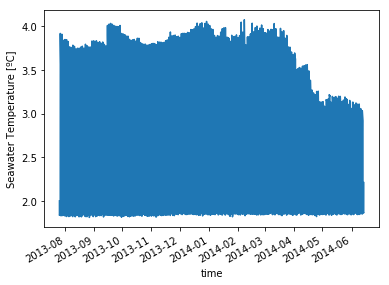

In [20]:
ds.ctdpf_ckl_seawater_temperature.plot()